In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

In [ ]:
X, y = make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.4)


In [ ]:
print(X.shape)
print(y.shape)

(120, 2)
(120,)


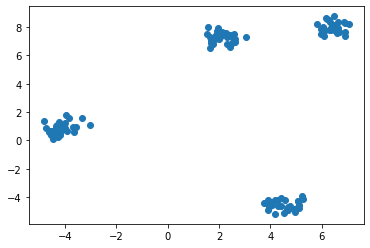

In [ ]:
# wykres punktowy
plt.figure()
plt.scatter(X[:,0], X[:,1])

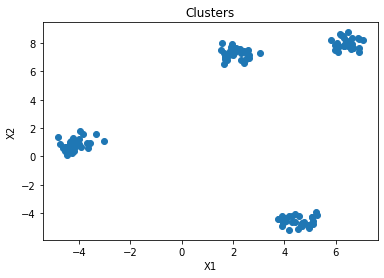

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_title("Clusters")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

In [ ]:
# Kmeans
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0, init='random').fit(X)
print(kmeans.labels_)

[1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1
 1 1 1 0 0 1 1 0 0]


In [ ]:
points_to_predict = np.array([[4, 0],
                              [2, 5]])

model_predict = kmeans.predict(points_to_predict)

In [ ]:
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[ 0.21222828 -1.84528574]
 [ 4.2605065   7.63192573]]


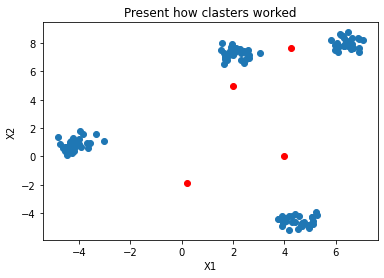

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], cmap=model_predict)
# cluster_centers
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='red')
# point to be classified
ax.scatter(points_to_predict[:, 0], points_to_predict[:, 1], color='red')
ax.set_title("Present how clasters worked")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

In [ ]:
# calculate inertia
kmeans.inertia_

1901.8038200492783

## Kmeans clustering - example II

In [ ]:
def drawArrow(A, B):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.5, length_includes_head=True)


In [ ]:
X_2, y_2 = make_blobs(n_samples=350, n_features=2, centers=5, cluster_std=0.80)
y_2 = y_2.reshape(350, 1)

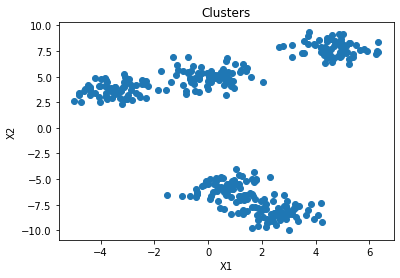

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_2[:, 0], X_2[:, 1])
ax.set_title("Clusters")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

In [ ]:
kmeans_2 = KMeans(n_clusters=2, random_state=0, init='random').fit(X_2)
print(kmeans_2.labels_)

[1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1
 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0
 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0
 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0
 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0
 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0
 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1]


In [ ]:
cluster_centers_2 = kmeans_2.cluster_centers_
print(cluster_centers_2)

[[ 1.58307677 -7.04594704]
 [ 0.43298526  5.51490821]]


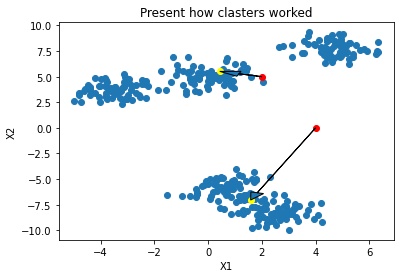

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_2[:, 0], X_2[:, 1])
# cluster_centers
ax.scatter(cluster_centers_2[:, 0], cluster_centers_2[:, 1], color='yellow')
# point to be classified
ax.scatter(points_to_predict[:, 0], points_to_predict[:, 1], color='red')
drawArrow(points_to_predict[0], cluster_centers_2[0])  
drawArrow(points_to_predict[1], cluster_centers_2[1]) 
ax.set_title("Present how clasters worked")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

In [ ]:
# calculate inertia
kmeans_2.inertia_

3617.4265798507577